In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist.csv')
data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:5000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[5000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([2, 9, 3, ..., 0, 0, 3])

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.1,701)

Iteration:  0
[9 1 9 ... 9 1 9] [2 9 3 ... 0 0 3]
0.06001927307769232
Iteration:  10
[0 1 0 ... 3 1 7] [2 9 3 ... 0 0 3]
0.11480208731067838
Iteration:  20
[4 1 0 ... 0 1 7] [2 9 3 ... 0 0 3]
0.14780268732158766
Iteration:  30
[4 1 0 ... 0 1 0] [2 9 3 ... 0 0 3]
0.20038546155384643
Iteration:  40
[4 1 0 ... 0 1 0] [2 9 3 ... 0 0 3]
0.23493154420989473
Iteration:  50
[4 1 0 ... 0 1 0] [2 9 3 ... 0 0 3]
0.2729140529827815
Iteration:  60
[4 4 0 ... 0 1 0] [2 9 3 ... 0 0 3]
0.31282386952490043
Iteration:  70
[4 4 0 ... 0 1 0] [2 9 3 ... 0 0 3]
0.3506791032564228
Iteration:  80
[1 4 0 ... 0 1 0] [2 9 3 ... 0 0 3]
0.3841342569864907
Iteration:  90
[1 4 0 ... 0 1 1] [2 9 3 ... 0 0 3]
0.41208021964035707
Iteration:  100
[1 4 0 ... 4 1 1] [2 9 3 ... 0 0 3]
0.44188076146839034
Iteration:  110
[3 4 0 ... 4 1 1] [2 9 3 ... 0 0 3]
0.475754104620084
Iteration:  120
[3 4 0 ... 4 1 1] [2 9 3 ... 0 0 3]
0.5059182894234441
Iteration:  130
[3 4 1 ... 0 1 1] [2 9 3 ... 0 0 3]
0.5360824742268041
Iteration:

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


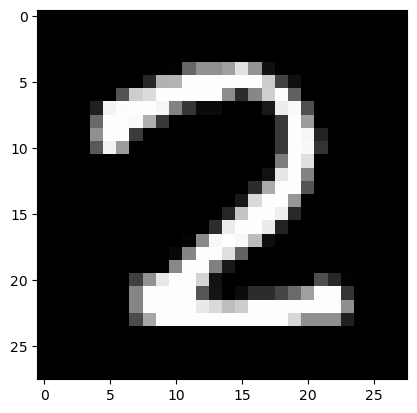

Prediction:  [9]
Label:  9


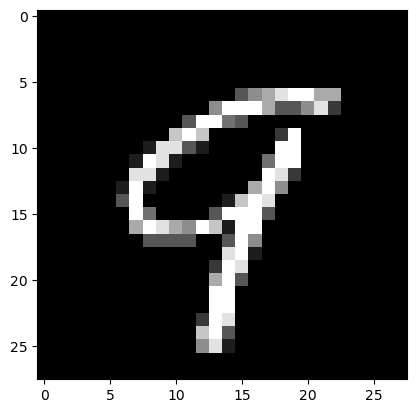

Prediction:  [3]
Label:  3


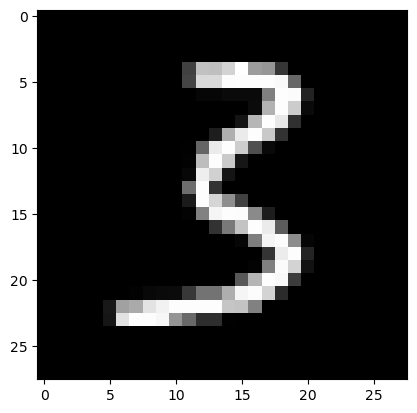

Prediction:  [3]
Label:  3


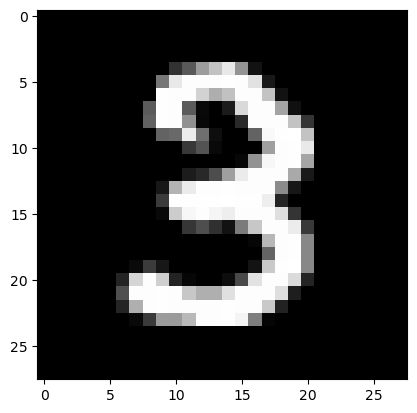

Prediction:  [4]
Label:  4


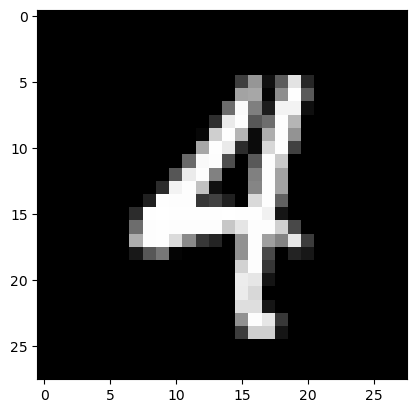

Prediction:  [7]
Label:  7


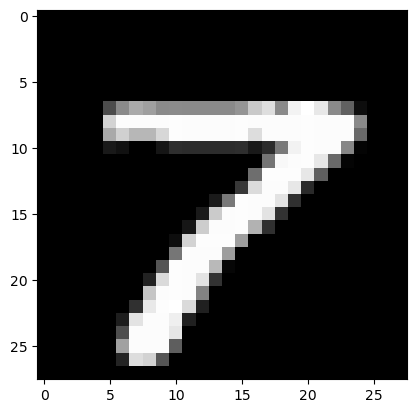

Prediction:  [4]
Label:  4


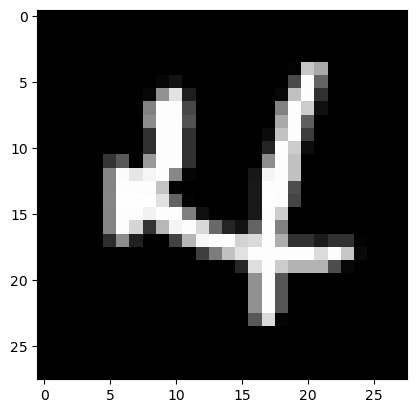

Prediction:  [1]
Label:  1


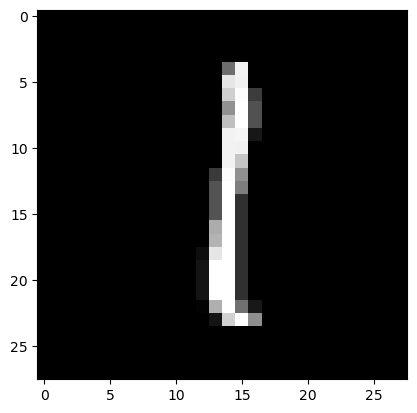

Prediction:  [5]
Label:  5


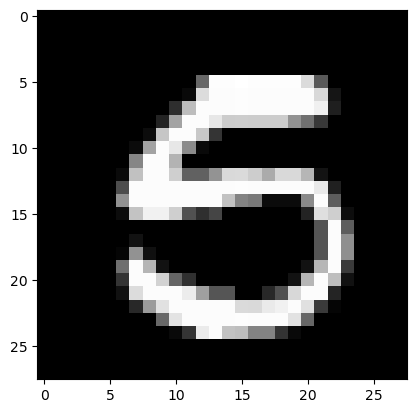

Prediction:  [1]
Label:  1


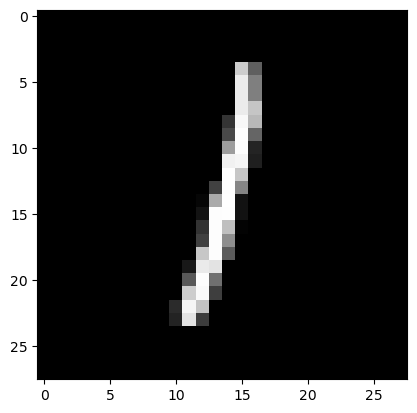

Prediction:  [3]
Label:  1


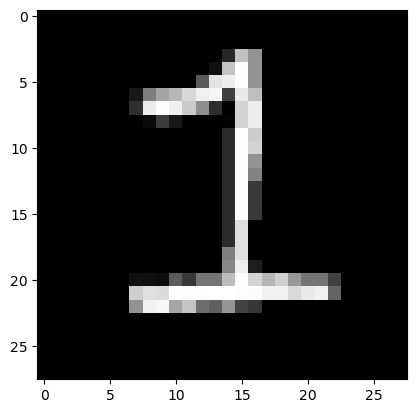

Prediction:  [3]
Label:  3


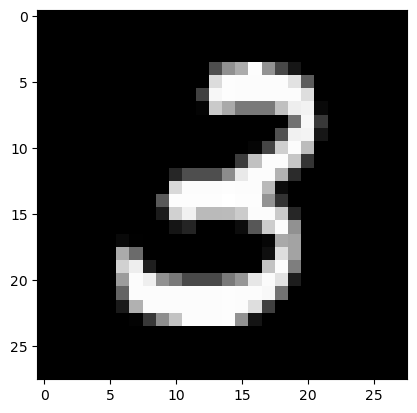

Prediction:  [8]
Label:  5


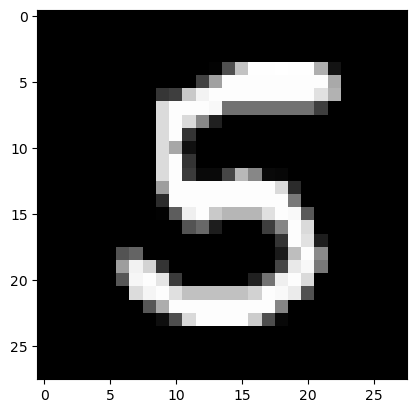

Prediction:  [8]
Label:  8


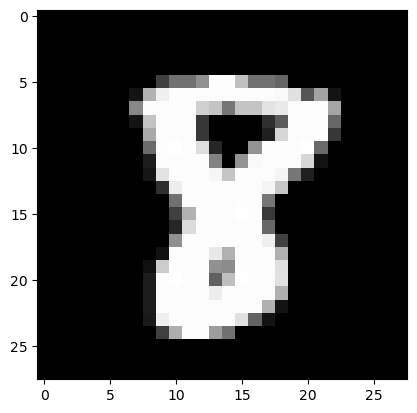

Prediction:  [2]
Label:  2


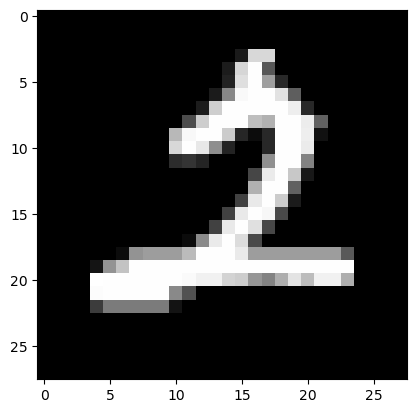

In [8]:
for i in range(15):
    test_prediction(i, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 1 2 ... 8 0 3] [7 1 2 ... 8 0 3]


0.8418